In [1]:
## pip install pymdptoolbox, tqdm, gym
import gym
import numpy as np
import mdptoolbox, mdptoolbox.example
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
from mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
import pandas as pd
## credit to https://www.kaggle.com/code/benjaminschreiber/markov-decision-processes/notebook
##https://www.kaggle.com/code/arjunayyangar/assignment4-1-frozen-lake/notebook

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/ej7793/.local/lib/python3.7/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


POLICY ITERATION WITH FOREST MANAGEMENT


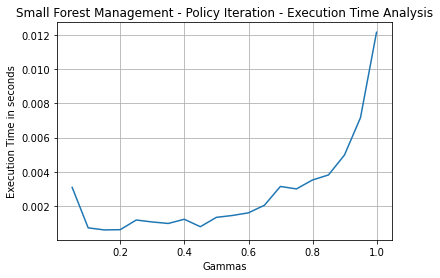

In [2]:
print('POLICY ITERATION WITH FOREST MANAGEMENT')
n = 20 
P, R = mdptoolbox.example.forest(S=25)
value_f = [0]*n
policy = [0]*n
iters = [0]*n
time_array = [0]*n
gamma_arr = [0] * n
for i in range(0,n):
    pi = mdptoolbox.mdp.PolicyIteration(P, R, (i+0.99)/n)
    pi.run()
    gamma_arr[i]=(i+0.99)/n
    value_f[i] = np.mean(pi.V)
    policy[i] = pi.policy
    iters[i] = pi.iter
    time_array[i] = pi.time


plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Small Forest Management - Policy Iteration - Execution Time Analysis')
plt.ylabel('Execution Time in seconds')
plt.grid()


In [28]:
R

array([[0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [4., 2.]])

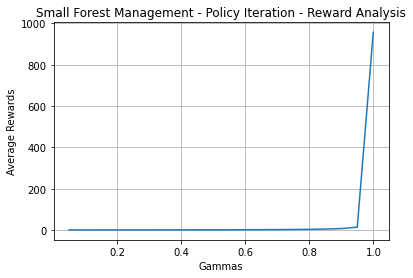

In [3]:
plt.plot(gamma_arr,value_f)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Small Forest Management - Policy Iteration - Reward Analysis')
plt.grid()

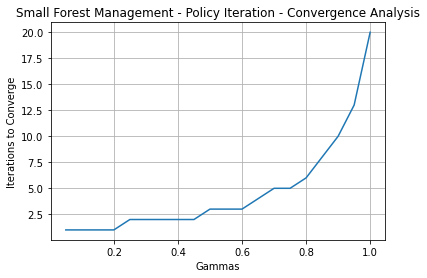

In [4]:
plt.plot(gamma_arr,iters)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Small Forest Management - Policy Iteration - Convergence Analysis')
plt.grid()

In [34]:
def plot_simple_data(x_var, y_var, x_label, y_label, title, figure_size=(4,3)):
    plt.rcParams["figure.figsize"] = figure_size
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot(x_var, y_var)
    plt.show()
def make_time_array(run_stats, variables):
    cumulative_sum = 0
    times = []
    output_dict = {v:[] for v in variables}
    output_dict["times"] = times
    for result in run_stats:
        times.append(result["Time"])
        for v in result:
            if v in variables:
                output_dict[v].append(result[v])
    return output_dict

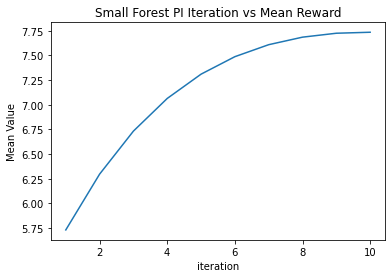

In [47]:
import hiive.mdptoolbox.mdp
pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, 0.9)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "Small Forest PI Iteration vs Mean Reward", figure_size=(6,4))

VALUE ITERATION WITH FOREST MANAGEMENT


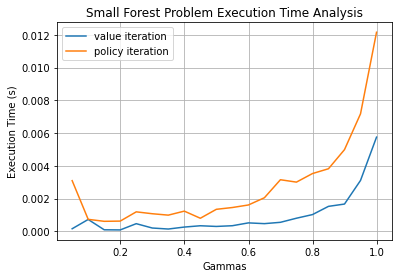

In [5]:
print('VALUE ITERATION WITH FOREST MANAGEMENT')
n = 20
P, R = mdptoolbox.example.forest(S=25)
value_f2 = [0]*n
policy2 = [0]*n
iters2 = [0]*n
time_array2 = [0]*n
gamma_arr2 = [0] * n
for i in range(0,n):
    pi = mdptoolbox.mdp.ValueIteration(P, R, (i+0.99)/n)
    pi.run()
    gamma_arr2[i]=(i+0.99)/n
    value_f2[i] = np.mean(pi.V)
    policy2[i] = pi.policy
    iters2[i] = pi.iter
    time_array2[i] = pi.time


plt.plot(gamma_arr2, time_array2, label = 'value iteration')
plt.plot(gamma_arr, time_array, label = 'policy iteration')

plt.xlabel('Gammas')
plt.title('Small Forest Problem Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.grid()

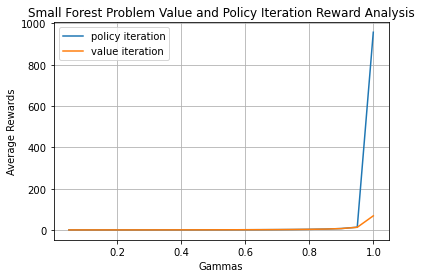

In [6]:
plt.plot(gamma_arr,value_f, label = 'policy iteration')
plt.plot(gamma_arr2,value_f2, label = 'value iteration')
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Small Forest Problem Value and Policy Iteration Reward Analysis')
plt.grid()
plt.legend()


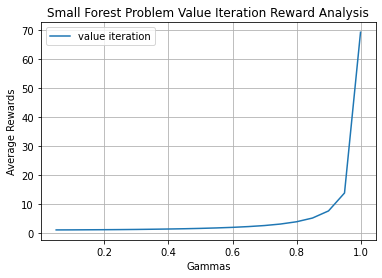

In [7]:
plt.plot(gamma_arr2,value_f2, label = 'value iteration')
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Small Forest Problem Value Iteration Reward Analysis')
plt.grid()
plt.legend()

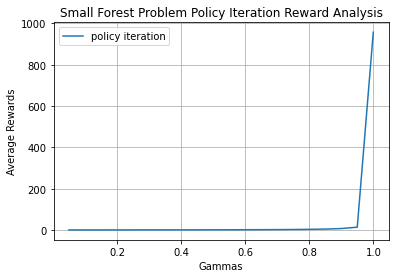

In [8]:
plt.plot(gamma_arr,value_f, label = 'policy iteration')
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Small Forest Problem Policy Iteration Reward Analysis')
plt.grid()
plt.legend()

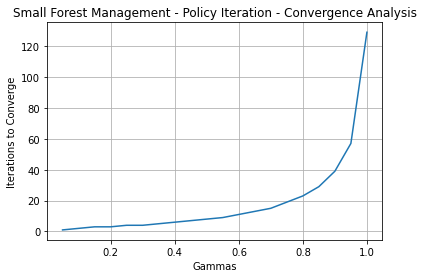

In [50]:
plt.plot(gamma_arr2,iters2)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Small Forest Management - Policy Iteration - Convergence Analysis')
plt.grid()

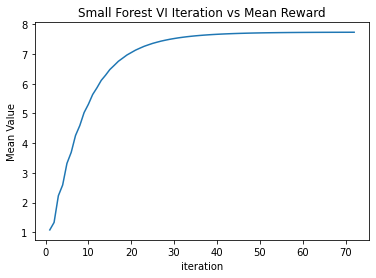

In [51]:
import hiive.mdptoolbox.mdp
pi = hiive.mdptoolbox.mdp.ValueIteration(P, R, 0.9, 0.00001)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "Small Forest VI Iteration vs Mean Reward", figure_size=(6,4))

Q_learning WITH FOREST MANAGEMENT


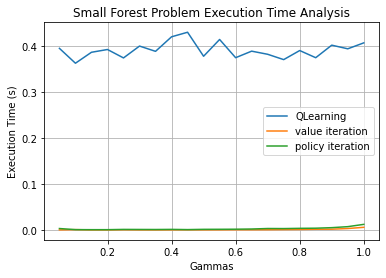

In [9]:
print('Q_learning WITH FOREST MANAGEMENT')
n = 20 
P, R = mdptoolbox.example.forest(S=25)
value_f3 = [0]*n
policy3 = [0]*n
time_array3 = [0]*n
gamma_arr3 = [0] * n
for i in range(0,n):
    pi = mdptoolbox.mdp.QLearning(P, R, (i+0.99)/n)
    pi.run()
    gamma_arr3[i]=(i+0.99)/n
    value_f3[i] = np.mean(pi.V)
    policy3[i] = pi.policy
    time_array3[i] = pi.time

plt.plot(gamma_arr3, time_array3, label = 'QLearning')
plt.plot(gamma_arr2, time_array2, label = 'value iteration')
plt.plot(gamma_arr, time_array, label = 'policy iteration')
plt.xlabel('Gammas')
plt.title('Small Forest Problem Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.grid()

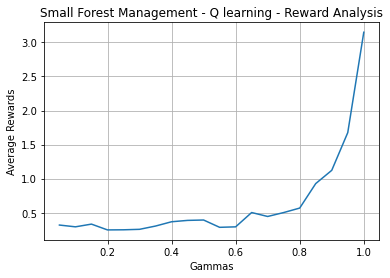

In [10]:
plt.plot(gamma_arr3,value_f3)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Small Forest Management - Q learning - Reward Analysis')
plt.grid()

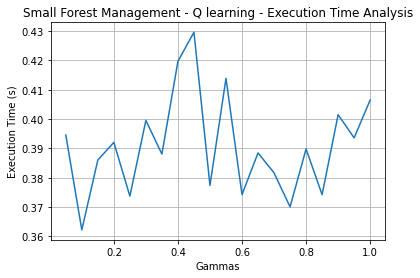

In [11]:
plt.plot(gamma_arr3, time_array3, label = 'Q Learning')
plt.xlabel('Gammas')
plt.ylabel('Execution Time (s)')
plt.title('Small Forest Management - Q learning - Execution Time Analysis')
plt.grid()

In [12]:
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
def qLearning(t, r, gammas, alphas, alpha_decays=[0.99], epsilon_decays=[0.99], n_iterations=[10000000], showResults=False):
    # create data structure to save off
    columns = ['gamma', 'alpha', 'alpha_decay', 'epsilon_decay', 'iterations', 'time', 'reward', 'mean_reward', 'average_steps', 'steps_stddev', 'success_pct', 'policy', 'mean_rewards', 'max_rewards', 'error']
    numTests = len(gammas)*len(alphas)*len(alpha_decays)*len(epsilon_decays)*len(n_iterations)
    data = pd.DataFrame(0.0, index=np.arange(numTests), columns=columns)
    
    print('Gamma,\tAlpha,\tTime,\tIter,\tReward')
    print(80*'_')
    
    testNum = 0
    for g in gammas:
        for a in alphas:
            for a_decay in alpha_decays:
                for e_decay in epsilon_decays:
                    for n in n_iterations:
                        print('Test Num %d/%d' %(testNum+1, numTests))
                        print('Gamma: %.2f,\tAlpha: %.2f,\tAlpha Decay:%.3f,\tEpsilon Decay:%.3f,\tIterations:%d' 
                             %(g, a, a_decay, e_decay, n))
                        
                        test = QLearning(t, r, gamma=g, alpha=a, alpha_decay=a_decay, epsilon_decay=e_decay, n_iter=n)
                        
                        runs  = test.run()
                        time  = runs[-1]['Time']
                        iters = runs[-1]['Iteration']
                        maxR  = runs[-1]['Max V']
                        meanR = runs[-1]['Mean V']
                        
                        max_rewards, mean_rewards, errors = [], [], []
                        for run in runs:
                            max_rewards.append(run['Max V'])
                            mean_rewards.append(run['Mean V'])
                            errors.append(run['Error'])
                        
                        #policy = np.array(test.policy)
                        #policy = policy.reshape(4,4)
                        
                        data['gamma'][testNum]         = g
                        data['alpha'][testNum]         = a
                        data['alpha_decay'][testNum]   = a_decay
                        data['epsilon_decay'][testNum] = e_decay
                        data['time'][testNum]          = time
                        data['iterations'][testNum]    = iters
                        data['reward'][testNum]        = maxR
                        data['mean_reward'][testNum]   = meanR
                        data['mean_rewards'][testNum]  = {tuple(mean_rewards)}
                        data['max_rewards'][testNum]   = {tuple(max_rewards)}
                        data['error'][testNum]         = {tuple(errors)}
                        data['policy'][testNum]        = {test.policy}
                        
                        print('%.2f,\t%.2f,\t%.2f,\t%d,\t%f' % (g, a, time, iters, maxR))
                        
                        if showResults:
                            pass
                        
                        testNum = testNum + 1
            
    # See differences in policy
    policies = data['policy']
    
        
    # replace all NaN's
    data.fillna(0, inplace=True)
    data.head()
        
    return data

In [68]:
gammas         = [0.5, 0.7, 0.99]
alpha_decays   = [0.9, 0.999]
epsilon_decays = [ 0.9, 0.999]
iterations     = [10000, 20000, 100000, 200000]

ql_data  = qLearning(P, R, gammas, alphas = [0.99], alpha_decays=alpha_decays, epsilon_decays=epsilon_decays, n_iterations=iterations, showResults=False)


Gamma,	Alpha,	Time,	Iter,	Reward
________________________________________________________________________________
Test Num 1/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:10000


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.50,	0.99,	0.45,	10000,	0.990220
Test Num 2/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:20000


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipyke

0.50,	0.99,	0.78,	20000,	1.300046
Test Num 3/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:100000
0.50,	0.99,	3.46,	100000,	7.392625
Test Num 4/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:200000
0.50,	0.99,	6.73,	200000,	2.203447
Test Num 5/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:10000
0.50,	0.99,	0.42,	10000,	1.256527
Test Num 6/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:20000
0.50,	0.99,	0.77,	20000,	1.298310
Test Num 7/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:100000
0.50,	0.99,	3.52,	100000,	1.310968
Test Num 8/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:200000
0.50,	0.99,	7.11,	200000,	1.309149
Test Num 9/48
Gamma: 0.50,	Alpha: 0.99,	Alpha Decay:0.999,	Epsilon Decay:0.900,	Iterations:10000
0.50,	0.99,	0.44,	10000,	6.470220
Test Num 10/48
Gamma: 0.50,	Alpha: 0.99,	

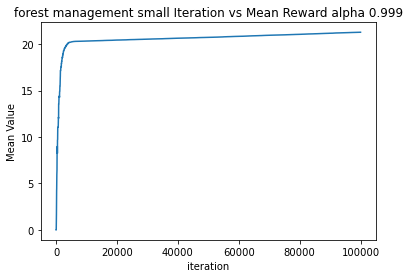

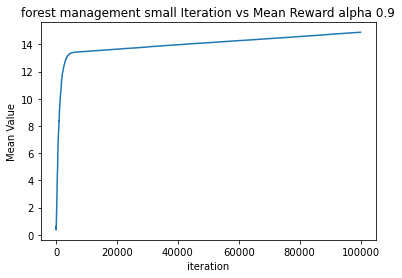

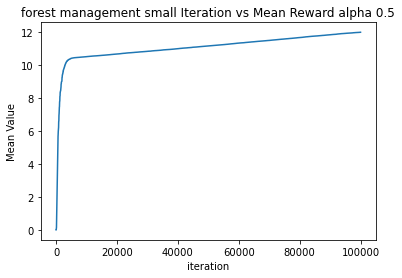

In [62]:
import hiive.mdptoolbox.mdp

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management small Iteration vs Mean Reward alpha 0.999", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.8,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management small Iteration vs Mean Reward alpha 0.9", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.5,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management small Iteration vs Mean Reward alpha 0.5", figure_size=(6,4))


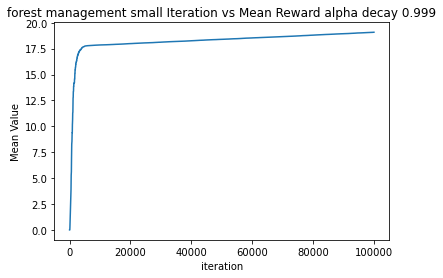

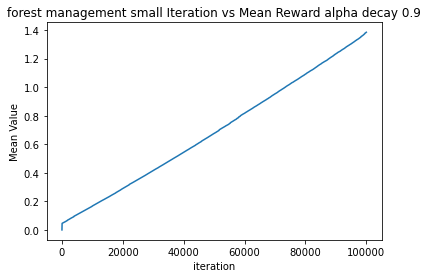

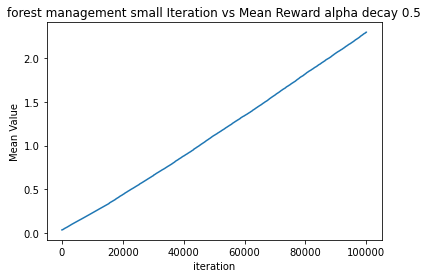

In [63]:
import hiive.mdptoolbox.mdp

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management small Iteration vs Mean Reward alpha decay 0.999", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.9, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management small Iteration vs Mean Reward alpha decay 0.9", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.5, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management small Iteration vs Mean Reward alpha decay 0.5", figure_size=(6,4))


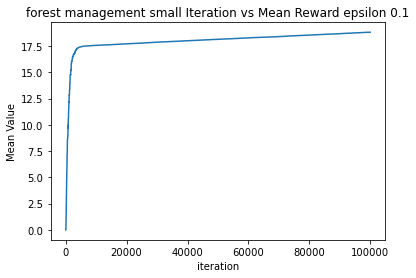

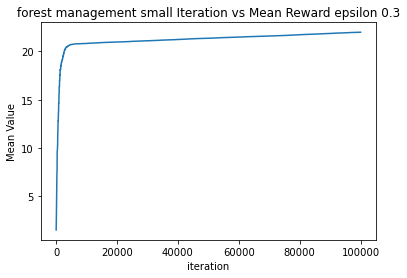

In [73]:
import hiive.mdptoolbox.mdp

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management small Iteration vs Mean Reward epsilon 0.1", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.9, epsilon_decay=0.9, n_iter=100000,  skip_check=True)

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.3,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management small Iteration vs Mean Reward epsilon 0.3", figure_size=(6,4))
pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.9, epsilon_decay=0.9, n_iter=100000,  skip_check=True)


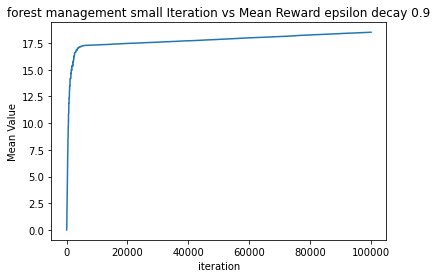

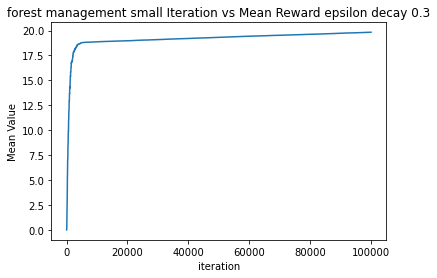

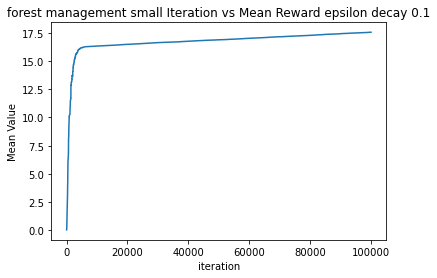

In [74]:
import hiive.mdptoolbox.mdp

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.9, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management small Iteration vs Mean Reward epsilon decay 0.9", figure_size=(6,4))

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.3, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management small Iteration vs Mean Reward epsilon decay 0.3", figure_size=(6,4))

pi = hiive.mdptoolbox.mdp.QLearning(P, R, 0.99, alpha = 0.99,epsilon=0.1,alpha_decay = 0.999, epsilon_decay=0.1, n_iter=100000,  skip_check=True)
pi.run()
pi_results = make_time_array(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_results["Mean V"])
plot_simple_data(pi_results["Iteration"], pi_results["Mean V"], 
                 "iteration", "Mean Value", "forest management small Iteration vs Mean Reward epsilon decay 0.1", figure_size=(6,4))


In [14]:
qlearning_mean_reward = pd.DataFrame(ql_data.groupby('iterations')['mean_reward'].mean()).reset_index()
qlearning_mean_reward

,iterations,mean_reward
0,10000.0,4.072078
1,20000.0,3.677260
2,100000.0,4.052311
3,200000.0,4.790510


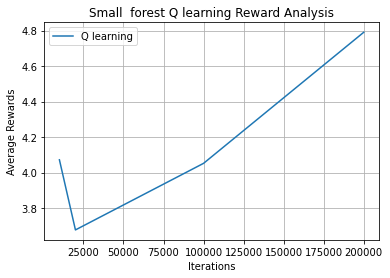

In [15]:
plt.plot(qlearning_mean_reward['iterations'],qlearning_mean_reward['mean_reward'], label = 'Q learning')
plt.xlabel('Iterations')
plt.ylabel('Average Rewards')
plt.title('Small  forest Q learning Reward Analysis')
plt.grid()
plt.legend()

In [16]:
def valueIteration(t, r, gammas, epsilons, showResults=False, max_iterations=100000):
    t0 = time.time()
    
    # create data structure to save off
    columns = ['gamma', 'epsilon', 'time', 'iterations', 'reward', 'mean_reward', 'average_steps', 'steps_stddev', 'success_pct', 'policy', 'mean_rewards', 'max_rewards', 'error']
    data = pd.DataFrame(0.0, index=np.arange(len(gammas)*len(epsilons)), columns=columns)
    
    print('Gamma,\tEps,\tTime,\tIter,\tReward')
    print(80*'_')
    
    testNum = 0
    for g in gammas:
        for e in epsilons:
            test = ValueIteration(t, r, gamma=g, epsilon=e, max_iter=max_iterations)
            
            runs  = test.run()
            Time  = runs[-1]['Time']
            iters = runs[-1]['Iteration']
            maxR  = runs[-1]['Max V']
            meanR = runs[-1]['Mean V']
            
            max_rewards, mean_rewards, errors = [], [], []
            for run in runs:
                max_rewards.append(run['Max V'])
                mean_rewards.append(run['Mean V'])
                errors.append(run['Error'])
            
            policy = np.array(test.policy)
            
            data['gamma'][testNum]        = g
            data['epsilon'][testNum]      = e
            data['time'][testNum]         = Time
            data['iterations'][testNum]   = iters
            data['reward'][testNum]       = maxR
            data['mean_reward'][testNum]  = meanR
            data['mean_rewards'][testNum] = {tuple(mean_rewards)}
            data['max_rewards'][testNum]  = {tuple(max_rewards)}
            data['error'][testNum]        = {tuple(errors)}
            data['policy'][testNum]       = {test.policy}
            
            print('%.2f,\t%.0E,\t%.2f,\t%d,\t%f' % (g, e, Time, iters, maxR))
            
            testNum = testNum + 1
        
    endTime = time.time() - t0
    print('Time taken: %.2f' % endTime)
    
    # See differences in policy
    policies = data['policy']
    
    # replace all NaN's
    data.fillna(0, inplace=True)
    data.head()
        
    return data

In [66]:
from hiive.mdptoolbox.mdp import ValueIteration

gammas   = [0.1, 0.3, 0.6, 0.8, 0.9, 0.95, 0.99]
epsilons = [1e-2, 1e-3, 1e-8, 1e-12]
vi_data  = valueIteration(P, R, gammas, epsilons, showResults=False)


Gamma,	Eps,	Time,	Iter,	Reward
________________________________________________________________________________
0.10,	1E-02,	0.00,	2,	4.360000
0.10,	1E-03,	0.00,	3,	4.393300
0.10,	1E-08,	0.00,	8,	4.396613
0.10,	1E-12,	0.00,	12,	4.396613
0.30,	1E-02,	0.00,	4,	5.460862
0.30,	1E-03,	0.00,	6,	5.489575
0.30,	1E-08,	0.00,	15,	5.491933
0.30,	1E-12,	0.00,	22,	5.491933
0.60,	1E-02,	0.00,	11,	8.797055
0.60,	1E-03,	0.00,	15,	8.808703
0.60,	1E-08,	0.00,	33,	8.809994
0.60,	1E-12,	0.00,	48,	8.809994
0.80,	1E-02,	0.00,	23,	14.863209
0.80,	1E-03,	0.00,	30,	14.880132
0.80,	1E-08,	0.00,	65,	14.883720
0.80,	1E-12,	0.00,	93,	14.883721
0.90,	1E-02,	0.00,	39,	23.089675
0.90,	1E-03,	0.00,	50,	23.147532
0.90,	1E-08,	0.10,	105,	23.172360
0.90,	1E-12,	0.01,	149,	23.172433
0.95,	1E-02,	0.00,	58,	33.139465
0.95,	1E-03,	0.00,	72,	33.389656


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipyke

0.95,	1E-08,	0.01,	146,	33.620503
0.95,	1E-12,	0.01,	205,	33.625545
0.99,	1E-02,	0.01,	92,	60.701641
0.99,	1E-03,	0.01,	112,	64.123878
0.99,	1E-08,	0.01,	212,	73.867071
0.99,	1E-12,	0.01,	292,	76.974951
Time taken: 0.27


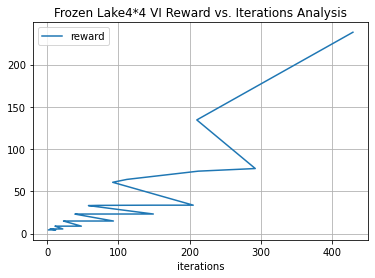

In [30]:
vi_data.plot(x='iterations', y='reward', title="Frozen Lake4*4 VI Reward vs. Iterations Analysis")
plt.grid(True)

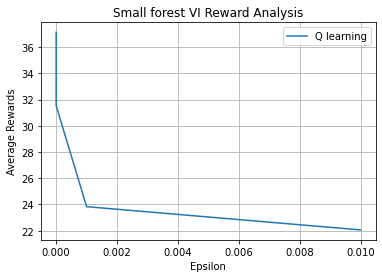

In [59]:
vi_eps_mean_reward = pd.DataFrame(vi_data.groupby('epsilon')['mean_reward'].mean()).reset_index()
vi_eps_mean_reward
plt.plot(vi_eps_mean_reward['epsilon'],vi_eps_mean_reward['mean_reward'], label = 'Q learning')
plt.xlabel('Epsilon')
plt.ylabel('Average Rewards')
plt.title('Small forest VI Reward Analysis')
plt.grid()
plt.legend()

In [25]:
len(P[0])

25

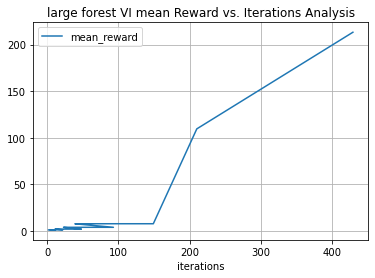

In [21]:
vi_data.plot(x='iterations', y='mean_reward', title="large forest VI mean Reward vs. Iterations Analysis")
plt.grid(True)

In [22]:
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
def policyIteration(t, r, gammas, showResults=False, max_iterations=100000):
    t0 = time.time()
    
    # create data structure to save off
    columns = ['gamma', 'epsilon', 'time', 'iterations', 'reward', 'mean_reward', 'average_steps', 'steps_stddev', 'success_pct', 'policy', 'mean_rewards', 'max_rewards', 'error']
    data = pd.DataFrame(0.0, index=np.arange(len(gammas)), columns=columns)
    
    print('gamma,\ttime,\titer,\treward')
    print(80*'_')
    
    testnum = 0
    for g in gammas:
        test = PolicyIteration(t, r, gamma=g, max_iter=max_iterations, eval_type="matrix") # eval_type="iterative"
        
        runs  = test.run()
        Time  = test.time
        iters = test.iter
        maxr  = runs[-1]['Max V']
        meanR = runs[-1]['Mean V']
                
        max_rewards, mean_rewards, errors = [], [], []
        for run in runs:
            max_rewards.append(run['Max V'])
            mean_rewards.append(run['Mean V'])
            errors.append(run['Error'])
        
        data['gamma'][testnum]        = g
        data['time'][testnum]         = Time
        data['iterations'][testnum]   = iters
        data['reward'][testnum]       = maxr
        data['mean_reward'][testnum]  = meanR
        data['mean_rewards'][testnum] = {tuple(mean_rewards)}
        data['max_rewards'][testnum]  = {tuple(max_rewards)}
        data['error'][testnum]        = {tuple(errors)}
        data['policy'][testnum]       = {test.policy}
        
        print('%.2f,\t%.2f,\t%d,\t%f' % (g, Time, iters, maxr))
        
        if showResults:
            plot_forest(policy, title)
            pass
        
        testnum = testnum + 1
        
    endTime = time.time() - t0
    print('Time taken: %.2f' % endTime)
    
    # see differences in policy
    policies = data['policy']
        
    # replace all nan's
    data.fillna(0, inplace=True)
    data.head()
        
    return data

gamma,	time,	iter,	reward
________________________________________________________________________________
0.10,	0.00,	1,	4.396613
0.30,	0.00,	2,	5.491933
0.45,	0.00,	2,	6.762327
0.60,	0.00,	3,	8.809994
0.70,	0.00,	5,	11.054551
0.80,	0.00,	6,	14.883721
0.90,	0.00,	10,	23.172434
0.99,	0.01,	18,	79.492429
Time taken: 0.05


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/ipyke

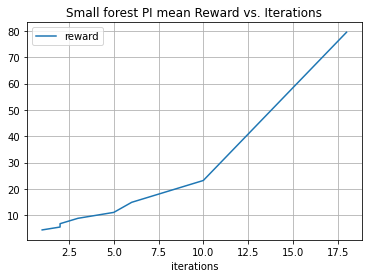

In [65]:
gammas   = [0.1, 0.3, 0.45, 0.6, 0.7, 0.8, 0.9, 0.99] 
pi_data  = policyIteration(P, R, gammas, showResults=False)
pi_data.plot(x='iterations', y='reward', title="Small forest PI mean Reward vs. Iterations")
plt.grid(True)

In [69]:
# find the highest score for pi
bestRun_pi = pi_data['reward'].max()
print('best reward: %d' % bestRun_pi)
# find the highest score for vi
bestRun_vi = vi_data['reward'].max()
print('best reward: %d' % bestRun_vi)
# find the highest score for ql
bestRun_ql = ql_data['reward'].max()
print('best reward: %d' % bestRun_ql)

best reward: 79
best reward: 76
best reward: 73
